<a href="https://colab.research.google.com/github/esrakucuk1/Makine_Ogrenmesi_OSB_Tahmin_Projesi/blob/main/Makine%C3%96%C4%9FrenmesiProje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Gerekli kütüphaneleri tanımlıyoruz.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive') # drive ve colab bağladık.

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
excel_path = '/content/gdrive/MyDrive/autism_screening.csv'
ds = pd.read_csv(excel_path, )
pd.set_option('max_colwidth', 150)
ds.head(703)
# Belirtilen hedefteki veri dosyasını ds değişkenine atıyoruz.

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,1,1,1,1,1,1,1,1,1,1,...,f,Pasifika,no,no,Australia,no,10.0,18 and more,Self,YES
699,0,1,0,1,1,0,1,1,1,1,...,f,White-European,no,no,Russia,no,7.0,18 and more,Self,YES
700,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3.0,18 and more,Parent,NO
701,1,0,1,1,1,0,1,1,0,1,...,f,?,no,no,Russia,no,7.0,18 and more,?,YES


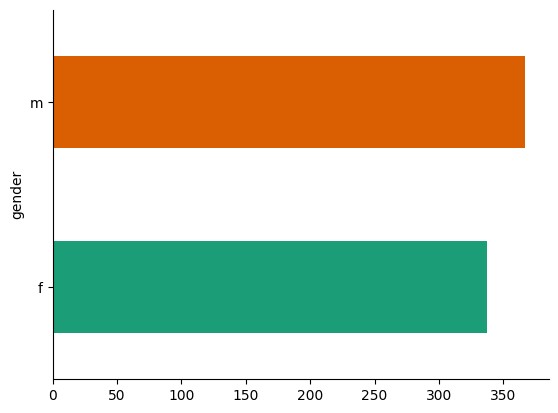

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
ds.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
fig = px.histogram(ds, x='Class/ASD')
fig.update_layout(title_text='<b>Numero de pacientes autistas y no autistas</b>', title_x=0.5)
fig.show() #çıktı veri görselleştirdim

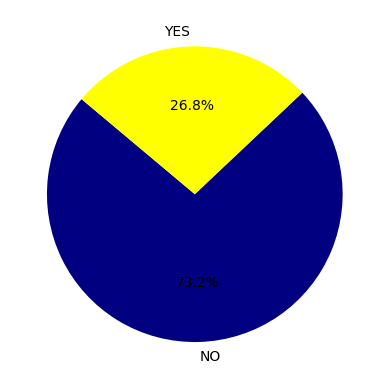

In [ ]:
count_target = ds['Class/ASD'].value_counts()
plt.pie(count_target, labels = count_target.index, autopct='%1.1f%%', startangle=140, colors=['#000080', '#FFFF00'])
plt.show()

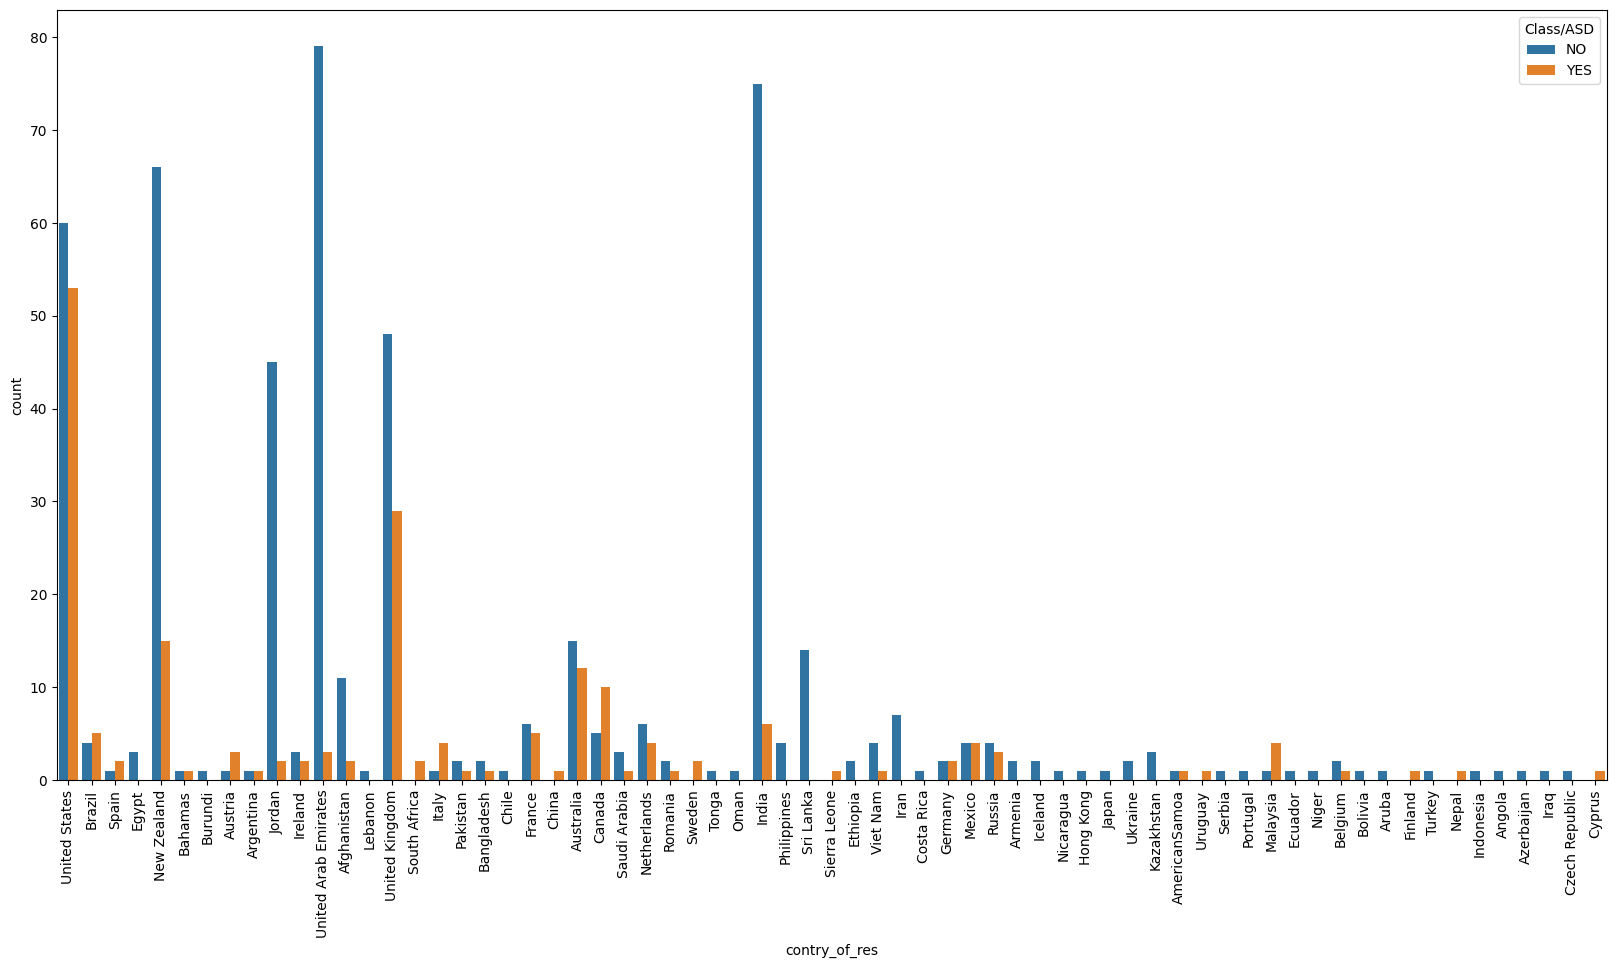

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=ds, x=ds['contry_of_res'], hue='Class/ASD')
plt.xticks(rotation=90)
plt.show()

In [ ]:
X = ds.drop(columns=["Class/ASD","ethnicity"]) # Class/ASD ve etnicity değişkeni hariç diğer tüm  değişkenleri X değişkenine atıyoruz (Bağımsız değişkenler)
y = ds["Class/ASD"] # "Class/ASD" değişkenimizi y değişkenine atıyoruz (Bağımlı değişken)

cols_to_encode = ['gender', 'age_desc', 'jundice', 'austim', 'contry_of_res', 'used_app_before', 'relation']

# Bağımsız değişkenlerdeki metinsel ifadeleri sayısal değere dönüştürüyoruz.
label_encoder_X = LabelEncoder()
for col in cols_to_encode:
    X[col] = label_encoder_X.fit_transform(X[col])

# bağımslı değişkendeki "YES" ve "NO" ifadelerini 1 ve 0 değerine dönüştürüyoruz
label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(y)

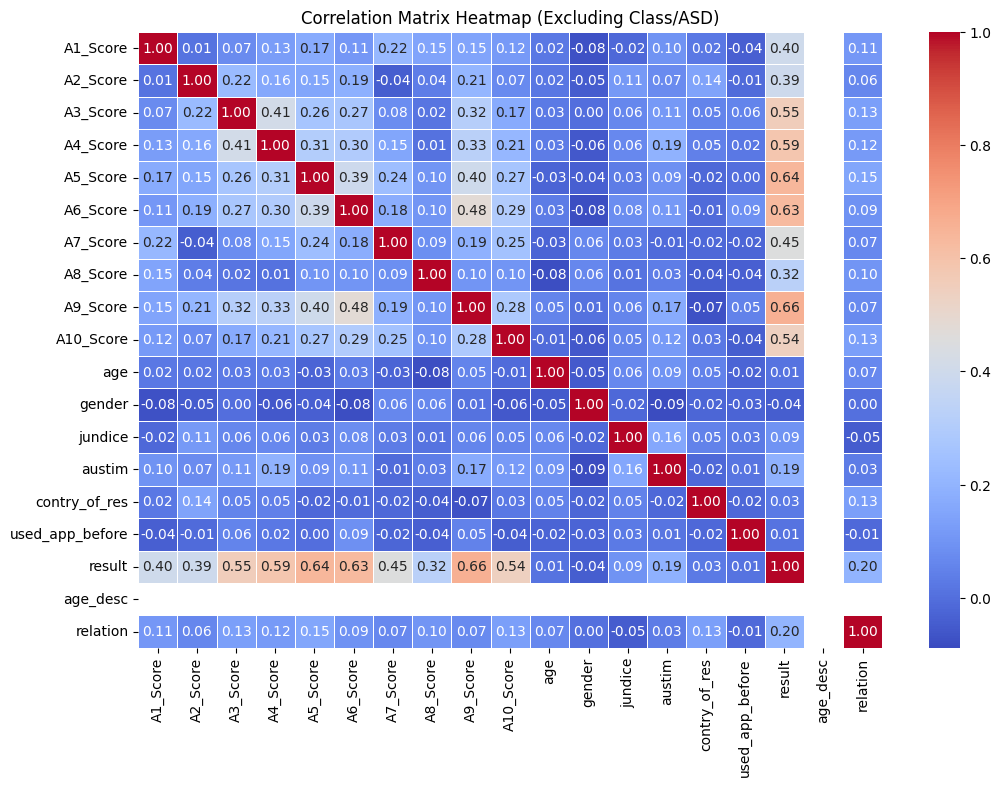

In [ ]:
correlation_matrix = X.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap (Excluding Class/ASD)')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Verileri eğitmede kullanacağımız kütüphaneleri tanımlıyoruz

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=42) # Veri setini eğitim ve test veri kümelerine ayırır.

In [ ]:
# Eksik değerler doldurularak tutarlı bir veri seti sağlanır.
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

classifier = KNeighborsClassifier(n_neighbors=7,  p=2) # Modelin  kaç komşuyu analiz edeceğini belirleriz.
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred = classifier.predict(X_test) # Daha önce eğittiğimiz veri kümesinin tahminlemesini yapıyoruz.

In [ ]:
#Doğruluk oranını hesaplatıyoruz
accuary = accuracy_score(y_test,y_pred)
print('doğruluk= ',accuary)

doğruluk=  0.950354609929078


In [ ]:
row = ds.iloc[25].to_numpy() #seçeceğimiz satırı yazıyoruz.
z = row[20:] # 20. indeksten itibaren
print(z)

['YES']
